# Allstate Claims Severity
See description, data and other details https://www.kaggle.com/competitions/allstate-claims-severity/overview

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

from autogluon.tabular import TabularDataset, TabularPredictor

### Get Dataset

In [2]:
data_folder = '../../data/allstate-claims-severity/'

train_df = pd.read_csv(f'{data_folder}train.csv')
test_df = pd.read_csv(f'{data_folder}test.csv')

In [3]:
train_df.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [4]:
test_df.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


### Data analysis

In [5]:
train_df.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,194592.000000,194592.000000,194592.000000,194592.000000,194592.000000,194592.000000,194592.000000,194592.000000,194592.000000,194592.000000,194592.000000,194592.000000,194592.000000,194592.000000,194592.000000,194592.000000
mean,303280.484902,0.493792,0.507093,0.498875,0.491791,0.487384,0.490856,0.484889,0.486468,0.485425,0.498049,0.493431,0.493072,0.493112,0.495594,3036.251056
std,173957.482834,0.187636,0.207144,0.202033,0.211273,0.208998,0.205329,0.178466,0.199410,0.181634,0.185915,0.209739,0.209442,0.212785,0.222486,2900.977675
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,152556.750000,0.346090,0.358319,0.336963,0.327354,0.281143,0.335580,0.350175,0.312800,0.358970,0.364580,0.310961,0.308395,0.315758,0.294610,1204.262500
50%,304310.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.437310,0.461190,0.457203,0.462286,0.363547,0.407325,2114.585000
75%,455284.250000,0.623912,0.681761,0.634224,0.652072,0.635304,0.654290,0.590807,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724610,3862.492500
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194592 entries, 0 to 194591
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 196.0+ MB


In [7]:
train_df.isna().values.sum() # checking for nas 

0

### AutoML by MlJar

In [8]:
target_var = 'loss'
X_train = train_df.drop(columns=[target_var], axis=1)
y_train = train_df[target_var]

In [9]:
def regression_metrics(y_true, y_hat):
    print('MAE:', round(mean_absolute_error(y_true, y_hat)), 4)
    print('MAPE: ', round(mean_absolute_percentage_error(y_true, y_hat)), 4)
    print('MSE:', round(mean_squared_error(y_true, y_hat)), 4)
    print('RMSE:', round(np.sqrt(mean_squared_error(y_true, y_hat))), 4)
    print('R2:', round(r2_score(y_true, y_hat)), 4)
    

In [10]:
training_dataset = TabularDataset.from_records(train_df)
predictor = TabularPredictor(label=target_var, eval_metric='mae').fit(training_dataset)

No path specified. Models will be saved in: "AutogluonModels\ag-20230730_070103\"
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230730_070103\"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   312.27 GB / 433.03 GB (72.1%)
Train Data Rows:    194592
Train Data Columns: 131
Label Column: loss
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (121012.25, 0.67, 3036.25106, 2900.97767)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during pre

[1000]	valid_set's l1: 1186.71
[2000]	valid_set's l1: 1179.36
[3000]	valid_set's l1: 1177.22
[4000]	valid_set's l1: 1176.58
[5000]	valid_set's l1: 1176.07


	-1175.3793	 = Validation score   (-mean_absolute_error)
	65.42s	 = Training   runtime
	0.38s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's l1: 1190.15
[2000]	valid_set's l1: 1187.91
[3000]	valid_set's l1: 1188.57


	-1186.5081	 = Validation score   (-mean_absolute_error)
	38.87s	 = Training   runtime
	0.2s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-1224.7033	 = Validation score   (-mean_absolute_error)
	655.11s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: CatBoost ...
	-1174.6546	 = Validation score   (-mean_absolute_error)
	7961.98s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-1207.1546	 = Validation score   (-mean_absolute_error)
	556.92s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
No improvement since epoch 1: early stopping
	-1200.7784	 = Validation score   (-mean_absolute_error)
	455.14s	 = Training   runtime
	0.3s	 = Validation runtime
Fitting model: XGBoost ...
	-1198.838	 = Validation score   (-mean_absolute_error)
	32.9s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-1256.4814	 = Validation score   (-mean_absolute_error)
	275.03s	

[1000]	valid_set's l1: 1174.47


	-1173.5582	 = Validation score   (-mean_absolute_error)
	30.63s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	-1156.4346	 = Validation score   (-mean_absolute_error)
	0.36s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 10096.45s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels\ag-20230730_070103\")


In [11]:
predictor.leaderboard();

                  model    score_val  pred_time_val      fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2 -1156.434619       1.602735  10039.451670                0.001002           0.360000            2       True         12
1         LightGBMLarge -1173.558169       0.138996     30.630967                0.138996          30.630967            1       True         11
2              CatBoost -1174.654588       0.212077   7961.984069                0.212077        7961.984069            1       True          6
3            LightGBMXT -1175.379314       0.379402     65.419423                0.379402          65.419423            1       True          3
4              LightGBM -1186.508056       0.196012     38.867652                0.196012          38.867652            1       True          4
5               XGBoost -1198.837969       0.111001     32.897073                0.111001          32.897073            1       True    

These features in provided data are not utilized by the predictor and will be ignored: ['cat55', 'cat62', 'cat64', 'cat70']
Computing feature importance via permutation shuffling for 127 features using 5000 rows with 5 shuffle sets...
	12049.43s	= Expected runtime (2409.89s per shuffle set)
	2228.63s	= Actual runtime (Completed 5 of 5 shuffle sets)


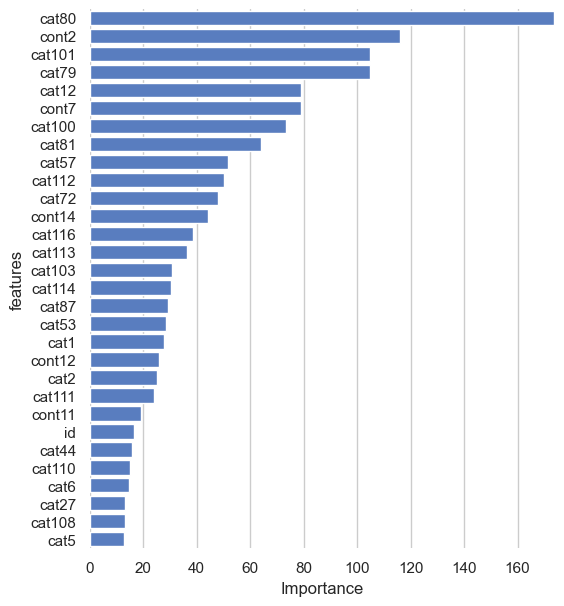

In [19]:
import matplotlib.pyplot as plt
feature_imp = predictor.feature_importance(training_dataset)
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 7))

# take top 30
feature_imp = feature_imp[:30]
# Plot the total crashes
sns.set_color_codes("muted")
sns.barplot(y=feature_imp.index, x=feature_imp.importance, label="Importance", color="b", ax=ax)

ax.set(xlim=(0, feature_imp.importance.max()+0.001), ylabel="features", xlabel="Importance")
sns.despine(left=True, bottom=True)

In [14]:
predictor.fit_summary();

*** Summary of fit() ***
Estimated performance of each model:
                  model    score_val  pred_time_val      fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2 -1156.434619       1.602735  10039.451670                0.001002           0.360000            2       True         12
1         LightGBMLarge -1173.558169       0.138996     30.630967                0.138996          30.630967            1       True         11
2              CatBoost -1174.654588       0.212077   7961.984069                0.212077        7961.984069            1       True          6
3            LightGBMXT -1175.379314       0.379402     65.419423                0.379402          65.419423            1       True          3
4              LightGBM -1186.508056       0.196012     38.867652                0.196012          38.867652            1       True          4
5               XGBoost -1198.837969       0.111001     32.897073         

C:\Users\okmic\.conda\envs\autogluon_env\lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


In [15]:
predictor.evaluate(training_dataset)

Evaluation: mean_absolute_error on test data: -948.8369868015063
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "mean_absolute_error": -948.8369868015063,
    "root_mean_squared_error": -1393.4337057504313,
    "mean_squared_error": -1941657.4923213795,
    "r2": 0.7692795544837571,
    "pearsonr": 0.88272730331831,
    "median_absolute_error": -668.5517285156252
}


{'mean_absolute_error': -948.8369868015063,
 'root_mean_squared_error': -1393.4337057504313,
 'mean_squared_error': -1941657.4923213795,
 'r2': 0.7692795544837571,
 'pearsonr': 0.88272730331831,
 'median_absolute_error': -668.5517285156252}

### Retest on train dataset

In [20]:
label = 'loss'
train_test_dataset = TabularDataset.from_records(train_df.drop(columns=[label], axis=1))
y_y_train = train_df[label]
train_predictions = predictor.predict(train_test_dataset)

In [21]:
regression_metrics(y_y_train, train_predictions)

MAE: 949 4
MAPE:  1 4
MSE: 1941657 4
RMSE: 1393 4
R2: 1 4


In [22]:
# get the residual errors and observe the distribution
residuals = y_y_train - train_predictions

C:\Users\okmic\.conda\envs\autogluon_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


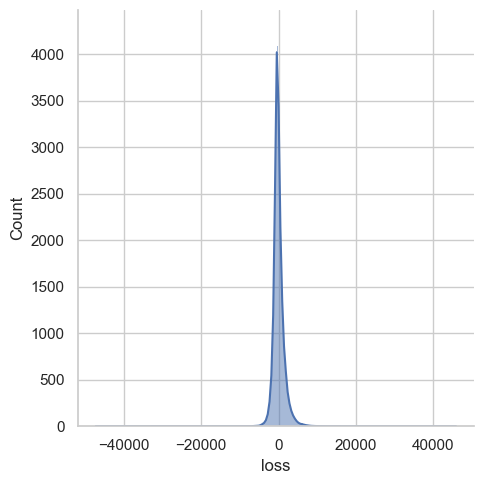

In [23]:
sns.displot(residuals, kde=True)